# Intelligent Placer

Пример работы алгоритма

In [ ]:
!pip install -r requirements.txt

Импортируем нужые функции и зададим пути директорий, в которых располагаются объекты 

In [66]:
from intelligent_placer_lib.intelligent_placer import check_image, process_predetermined_items
import matplotlib.pyplot as plt

predetermined_items_path = "data/items"
result_data_path = "data/results"
test_data_path = "data/test_dataset"

picture_for_false = "data/false.jpg"

### Обработка заранее известных объектов

Проводится бинаризация изображения и для дальнейшего отделения объекта от фона используется threshold_otsu. 
Для улучшения результатов применяется морфологическое закрытие. 

На выходе получаем экземпляр класса Item с заполнеными полями, которые содержат все необходимые свойства для дальнейшей работы с изображением, и обработанное изображение в двух видах: маска предмета, исходное изображение с нарисованым согласно маске контуром (используется только для более наглядной демонстрации)

In [6]:
processed_items = process_predetermined_items(predetermined_items_path)

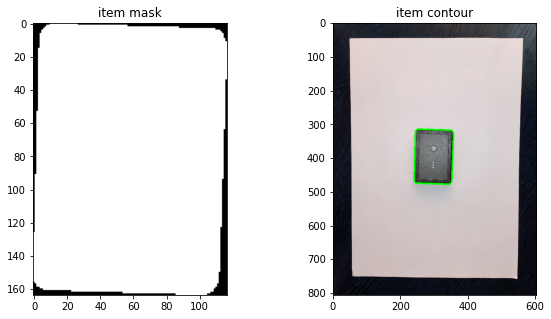

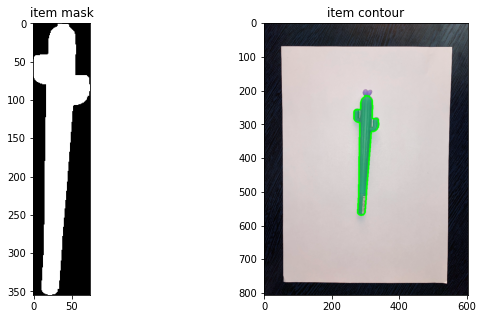

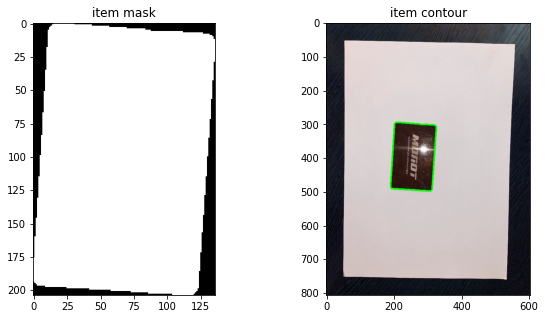

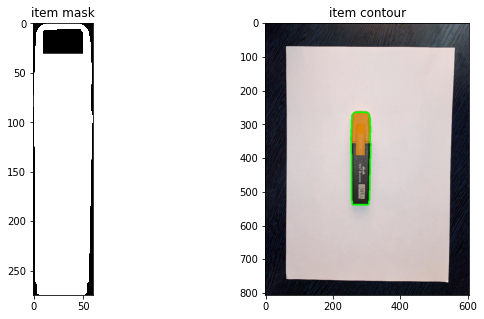

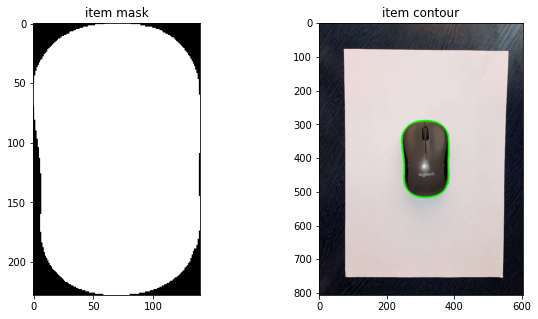

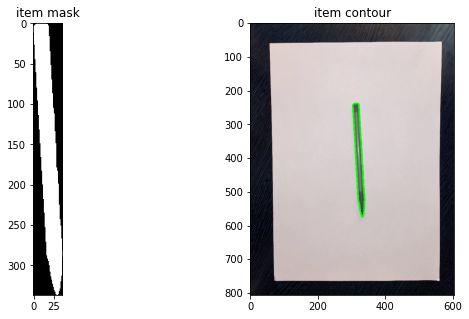

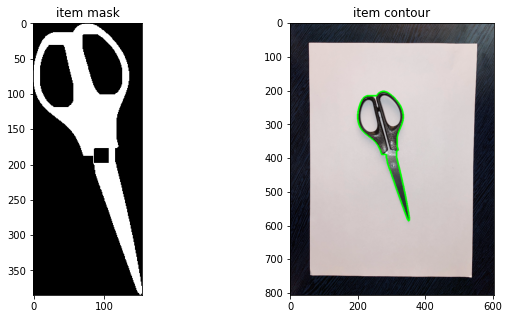

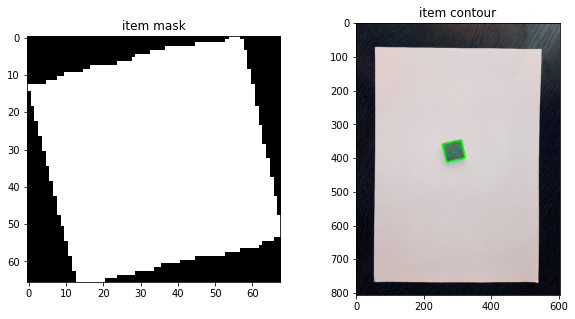

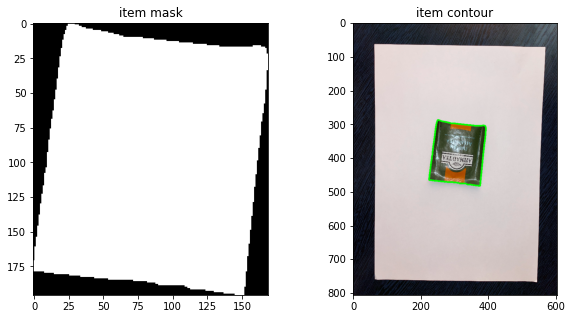

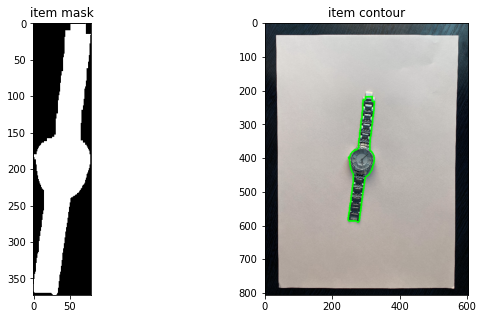

In [62]:
for el in processed_items:
    f, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].set_title("item mask")
    ax[1].set_title("item contour")
    ax[0].imshow(el[0], cmap="gray")
    ax[1].imshow(el[1])



### Определение предметов и многоугольника на входном изображении


Получаем маски многоугольника и предметов. Для этого находятся границы объектов с помощью детектора canny и заполняются области внутри найденных контуров.

Изображение разрезается отосительно центра по вертикали на две части.
Верхняя часть изображения содержит прямоугольник, соответственно нижняя часть содержит предметы

### Размещение предметов внутри многоугольника

1. Сравниваем суммарную площадь предметов с площадью прямоугольника. 


_Если уже на первом этапе становится понятно, что предмеы не могут быть размещены, то алгоритм останавливает свою работу и возвращает **False**_


2. Используя маски предметов и прямоугольника, размещаем поочередно предметы с помощью параллельного переноса на заданный шаг 



In [70]:
from os import listdir, path

for filename in listdir(test_data_path):
    check_image(str(path.join(test_data_path, filename)), result_data_path)

## Результат работы алгоритма

Для каждого случая, когда функция check_image возвращает **True**, отрисовывается найденный алгоритмом вариант размещения предметов в многоугльнике

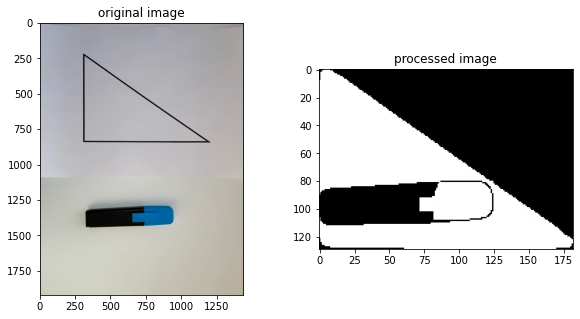

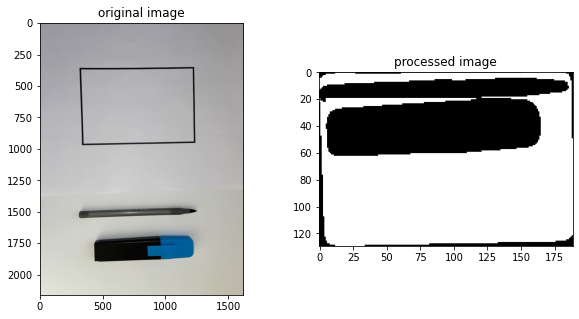

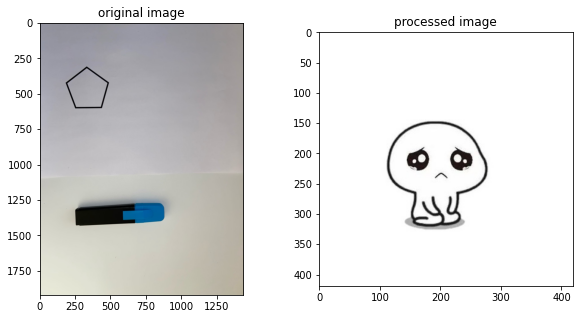

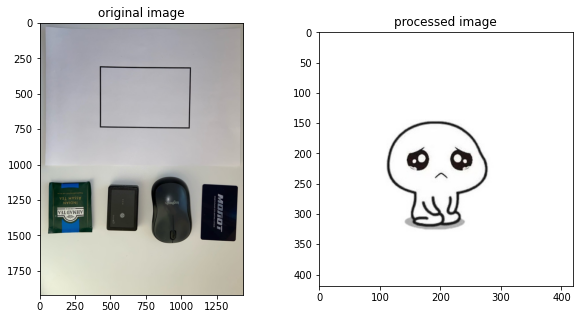

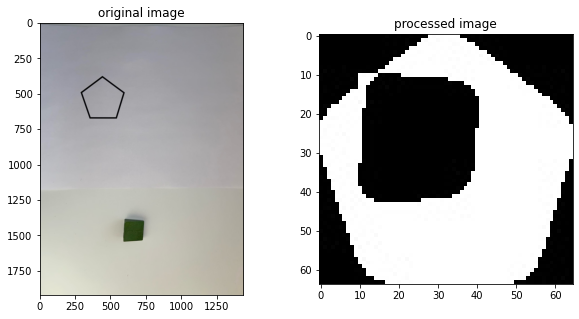

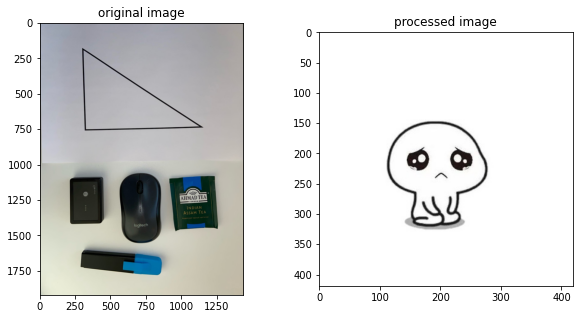

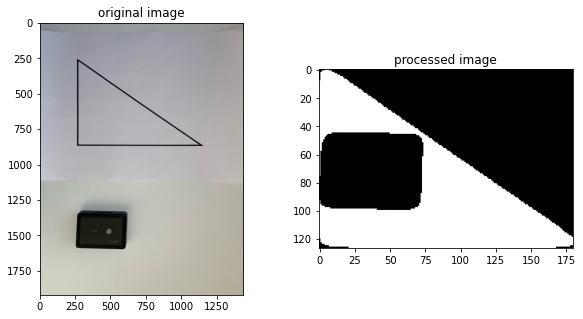

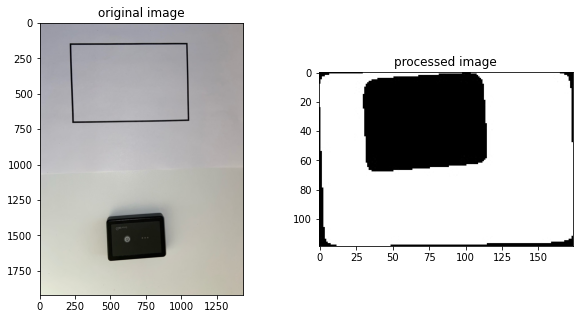

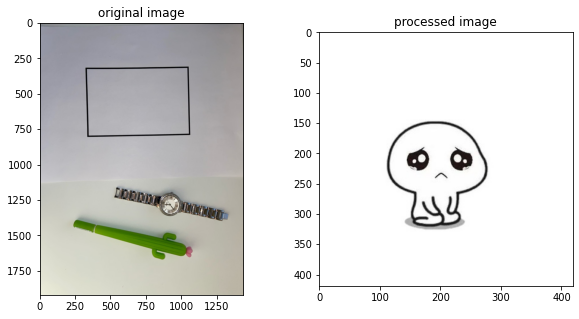

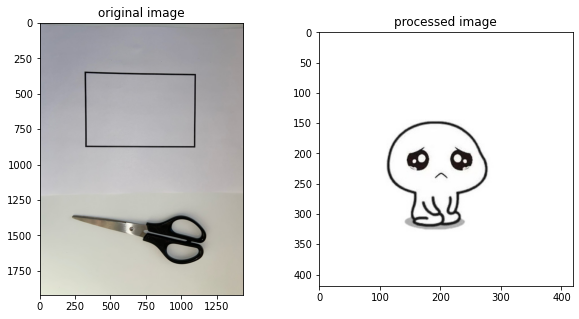

In [69]:
from imageio import imread

for filename in listdir(test_data_path):
    original_img = imread(str(path.join(test_data_path, filename)))
    try:
        processed_img = imread(str(path.join(result_data_path, f"True_{filename}")))
    except:
        processed_img = imread(picture_for_false)
    
    f, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].set_title("original image")
    ax[1].set_title("processed image")
    ax[0].imshow(original_img)
    ax[1].imshow(processed_img, cmap = "gray")


Алгоритм был запущен на датасете из 22 изображений. В результате было обнаружено 4 ошибки. Точность получается 0.8181

Это ошибки были ожидаемыми, так как во всех ошибочных ситуациях удачного размещения можно добиться вращением предметов, что на данном этапе не учитывается алгоритмом